<a href="https://colab.research.google.com/github/gideonkipkorir/Credit_card_fraud-detection/blob/main/Geospatial_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
import pandas as pd
import numpy as np
#importing libriaries for geo- visualizations
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
#Reading the dataset
r_df = pd.read_csv('/content/drive/MyDrive/data/API_EG.ELC.RNEW.ZS_DS2_en_csv_v2_4358440.csv',skiprows=4)
r_df = r_df[['Country Name', 'Country Code','2000', '2001', '2002', '2003', '2004','2005', '2006', '2007', '2008', '2009',\
           '2010', '2011', '2012']]

pop_df = pd.read_csv('/content/drive/MyDrive/data/API_SP.POP.TOTL_DS2_en_csv_v2_4485025.csv',skiprows=4)
pop = pd.DataFrame(pop_df[['Country Name',	'Country Code', '2005','2010' ]])

In [108]:
pop_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,107195.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,694665117.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,39835428.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0,470898870.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,33933611.0,NaN


In [109]:
pop_df.shape

(266, 67)

Task 1.2: Analysis of geospatial datasets

In [110]:
c_df = r_df.merge(pop, how ='left', right_on =['Country Code','Country Name'], left_on = ['Country Code','Country Name'])
c_df.head()

,Country Name,Country Code,2000,2001,2002,2003,2004,2005_x,2006,2007,2008,2009,2010_x,2011,2012,2005_y,2010_y
0,Aruba,ABW,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.327377,12.101021,14.915254,100028.0,101665.0
1,Africa Eastern and Southern,AFE,15.983738,17.584168,18.035637,16.930335,16.944777,17.691273,18.472924,18.173469,18.288642,19.755338,21.162999,21.323779,21.795825,453404076.0,518468229.0
2,Afghanistan,AFG,74.989094,72.811460,79.063971,70.249729,70.890841,74.061810,70.755750,72.000000,68.654822,87.176603,85.986547,82.487562,85.909980,25654274.0,29185511.0
3,Africa Western and Central,AFW,52.858873,51.323559,46.263090,45.451884,45.648428,44.093335,40.843210,36.936289,41.727171,41.550212,38.547084,37.703650,36.037935,305520588.0,350556886.0
4,Angola,AGO,63.114187,62.087912,64.759207,62.205514,78.405018,79.648241,80.611010,77.618900,75.409047,65.343189,67.957423,70.907804,60.799484,19433604.0,23356247.0


In [111]:
#filtering dataset with population less than 9029575
df = c_df[c_df['2005_y']<=  9029575] 

In [112]:
def renewable_eng_dist(data, col_name, year):
    #create a figure object
    fig = go.Figure(
        data = {
            #define all the data that the columns will have
            'type':'choropleth',
            'locations':data['Country Name'],
            'locationmode':'country names',
            'colorscale':'Portland',
            'colorscale':'magenta',
            'text':data['Country Code'],
            'z':data[col_name],
            #'colorbar':{'title':'world renewable electricity output for the years 2000'},
            'marker': {
                'line': {
                    'color':'rgb(255,255,255)',
                    'width':1
                }
            }
        },  
        #updated the layout of drawn map
        layout = {
        'width':1200,
        'height':900,
        "title_text":f"Renewable electricity output for the year {year}", "title_x":0.1, "title_y":0.96,
        "font_size":18,
        #show other geographical features
        'geo':{
          'scope':'world',
            'showlakes': True,                     
            'lakecolor':'rgb(85,173,240)',         
            'showrivers': True,                     
            'rivercolor':'rgb(85,173,240)',

        }  
        })
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    fig.update_geos(fitbounds="locations", visible=False)
    return fig

## Task 1.2.1
For year 2005, generate choropleth maps of renewable electricity output for only the countries having 
population less than 9029575. Very briefly interpret the generated map.

In [113]:
# plot the choropleth map showing the 2005 renewable electricity output
renewable_eng_dist(df, '2005_x', '2005').show()

##Task 1.2.2
For year 2005, generate choropleth maps of renewable electricity output for only the countries having 
population greater than 295516595. Very briefly interpret the generated map.

In [114]:
df = c_df[c_df['2005_y']>=  295516595]
renewable_eng_dist(df, '2005_x', '2005').show()

## Task 1.2.3
For year 2005, generate choropleth maps of renewable electricity output for only the countries having 
population between 138865014 and 1147609925. Very briefly interpret the generated map.


In [115]:
df_f = c_df[(c_df['2005_y']>=  138865014 ) & (c_df['2005_y']<= 1147609925 )]
renewable_eng_dist(df_f, '2005_x', '2005').show()

## Task 1.2.4
Plot (scatter or line plot) the percentage change in renewable electricity output from 2000 to 2010, for 
the country having the highest population in 2010. In this question, you must consider the renewable 
electricity output for each year between 2000 and 2010. Very briefly interpret the generated plot

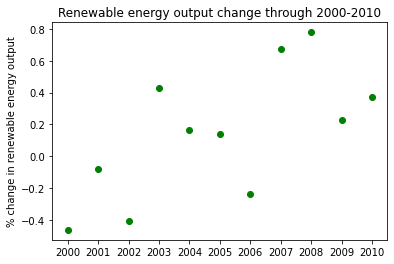

In [ ]:
d_arr = np.array(c_df)[259,2:13]
arr = np.array(c_df)[259,3:14]
change = list(arr - d_arr)
periods = list(c_df.columns[2:13])

periods[5]  = '2005'
periods[-1] ='2010'
#visualization of a scatter plot     
plt.scatter(periods, change, c ="green")
plt.ylabel("% change in renewable energy output")
plt.title('Renewable energy output change through 2000-2010')
plt.show()


## Task 1.2.5
Present a scatter plot between mean population of each country and mean renewable electricity output
considering from year 2000 until 2010. Very briefly interpret the generated plot, particularly look for any 
correlation (if present) among the plotted variables. In this question, you have to consider each year 
between 2000 and 2010 to find the mean population and mean renewable electricity output.


In [ ]:
pop_df = pop_df[['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010']]
pop_df.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,90866.0,92892.0,94992.0,97016.0,98744.0,100028.0,100830.0,101226.0,101362.0,101452.0,101665.0
1,398113044.0,408522129.0,419223717.0,430246635.0,441630149.0,453404076.0,465581372.0,478166911.0,491173160.0,504604672.0,518468229.0
2,20779957.0,21606992.0,22600774.0,23680871.0,24726689.0,25654274.0,26433058.0,27100542.0,27722281.0,28394806.0,29185511.0
3,267214544.0,274433894.0,281842480.0,289469530.0,297353098.0,305520588.0,313985474.0,322741656.0,331772330.0,341050537.0,350556886.0
4,16395477.0,16945753.0,17519418.0,18121477.0,18758138.0,19433604.0,20149905.0,20905360.0,21695636.0,22514275.0,23356247.0


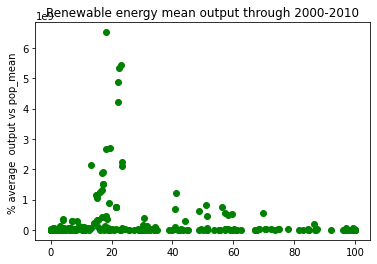

In [ ]:
mean_renew_ = np.array(c_df)[0:, 2:13]
mean_renew_ = [np.mean(mean_renew_ [i]) for i in range(len(mean_renew_ ))]
mean_pop = np.array(pop_df)
mean_pop = [np.mean(mean_pop[i]) for i in range(len(mean_pop))]
#visualization of a scatter plot     
plt.scatter(mean_renew_, mean_pop, c ="green")
plt.ylabel("% average  output vs pop_mean ")
plt.title('Renewable energy mean output through 2000-2010')
plt.show()

# PART 2 – Geospatial Sentiment Analysis using Social Media Data

In [116]:
tweets=pd.read_csv('/content/drive/MyDrive/data/Task 2 Tweet Data_1.csv')
tweets.head()

,tweetURL,tweetID,date,tweetContent,userLocation,isUserVerified,replyCount,retweetCount,likeCount,quoteCount,tweetLanguage,sourceLabel,coordinates,place
0,https://twitter.com/thomascheneygpc/status/146...,1461120800350621700,2021-11-17T23:55:19+00:00,@sjmuir Why I like local Renewable Natural Gas...,NaN,False,0,0,0,0,en,Twitter for iPhone,NaN,NaN
1,https://twitter.com/alexizawadzki/status/14611...,1461118744613187585,2021-11-17T23:47:09+00:00,Nevada is critical towards the clean energy tr...,Greater Vancouver,False,0,1,21,0,en,Twitter for iPhone,NaN,NaN
2,https://twitter.com/getiftech/status/146111665...,1461116656986599433,2021-11-17T23:38:51+00:00,COP26 Net Zero Commitments will Speed Energy T...,NaN,False,0,0,0,0,en,TekieBoard,NaN,NaN
3,https://twitter.com/KirkMMorrison/status/14611...,1461114703636140042,2021-11-17T23:31:06+00:00,@alanfryermedia You’re onto something! 🇨🇦 has ...,"Calgary, Alberta",False,0,1,5,0,en,Twitter for iPhone,NaN,NaN
4,https://twitter.com/ColumbiaUEnergy/status/146...,1461114427466346499,2021-11-17T23:30:00+00:00,"""The reality is that actions in this decade wi...","New York, New York",True,0,1,3,1,en,Twitter for Advertisers.,NaN,NaN


##Task 2.1: 
Data Pre-processing 

In [117]:
# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer
nltk.download("stopwords")
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [118]:
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")
# TEXT CLENAING
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [119]:
def preprocess(text, stem=False):
    # Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [120]:
tweets.tweetContent = tweets.tweetContent.apply(lambda x: preprocess(x))
tweets.head()

,tweetURL,tweetID,date,tweetContent,userLocation,isUserVerified,replyCount,retweetCount,likeCount,quoteCount,tweetLanguage,sourceLabel,coordinates,place
0,https://twitter.com/thomascheneygpc/status/146...,1461120800350621700,2021-11-17T23:55:19+00:00,like local renewable natural gas hydrogen fair...,NaN,False,0,0,0,0,en,Twitter for iPhone,NaN,NaN
1,https://twitter.com/alexizawadzki/status/14611...,1461118744613187585,2021-11-17T23:47:09+00:00,nevada critical towards clean energy transition,Greater Vancouver,False,0,1,21,0,en,Twitter for iPhone,NaN,NaN
2,https://twitter.com/getiftech/status/146111665...,1461116656986599433,2021-11-17T23:38:51+00:00,cop26 net zero commitments speed energy transi...,NaN,False,0,0,0,0,en,TekieBoard,NaN,NaN
3,https://twitter.com/KirkMMorrison/status/14611...,1461114703636140042,2021-11-17T23:31:06+00:00,onto something low carbon energy mix specifica...,"Calgary, Alberta",False,0,1,5,0,en,Twitter for iPhone,NaN,NaN
4,https://twitter.com/ColumbiaUEnergy/status/146...,1461114427466346499,2021-11-17T23:30:00+00:00,reality actions decade decisive planet warming...,"New York, New York",True,0,1,3,1,en,Twitter for Advertisers.,NaN,NaN


In [121]:
tweets.info()
print (f'dimension :{tweets.shape}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16726 entries, 0 to 16725
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweetURL        16726 non-null  object 
 1   tweetID         16726 non-null  int64  
 2   date            16726 non-null  object 
 3   tweetContent    16726 non-null  object 
 4   userLocation    13295 non-null  object 
 5   isUserVerified  16726 non-null  bool   
 6   replyCount      16726 non-null  int64  
 7   retweetCount    16726 non-null  int64  
 8   likeCount       16726 non-null  int64  
 9   quoteCount      16726 non-null  int64  
 10  tweetLanguage   16726 non-null  object 
 11  sourceLabel     16726 non-null  object 
 12  coordinates     0 non-null      float64
 13  place           0 non-null      float64
dtypes: bool(1), float64(2), int64(5), object(6)
memory usage: 1.7+ MB
dimension :(16726, 14)


In [122]:
tweets = tweets.drop(['coordinates'],1)
tweets = tweets[tweets['userLocation'].isnull() == False].reset_index()
tweets.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



(13295, 14)

## Task 2.2: Geocoding
Geocode on all the 500 tweets retrieved and filtered in the previous step. To perform geocoding, you 
must be using a Python based tool. Once the geocoding is performed then augment the tweet data set 
with two extra columns. One column should contain latitude and the other one should contain longitude 
information corresponding to a tweet.

In [123]:
df_twts = tweets.sample(500, random_state =99)
df_twts.shape

(500, 14)

In [167]:
from geopy.geocoders import Nominatim

def geo_locator (df_twts, userLocation):   
#initialize the Nominatim object
  Nomi_locator = Nominatim(user_agent="My App")
#finding latitude and longitude for the locations
  latitude = []
  longitude=[]
  for l in df_twts[userLocation][:350]:
    location = Nomi_locator.geocode(l, timeout = 2)
    if location is None:
      latitude.append(None)
      longitude.append(None)
    else:
      latitude.append(location.latitude)
      longitude.append(location.longitude)
  return [latitude ,longitude ]

In [125]:
latitude,longitude = geo_locator (df_twts, 'userLocation')

In [126]:
df_twts= df_twts[:350]
df_twts['latitude'] = latitude
df_twts['longitude'] = longitude
df_twts.sample(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,index,tweetURL,tweetID,date,tweetContent,userLocation,isUserVerified,replyCount,retweetCount,likeCount,quoteCount,tweetLanguage,sourceLabel,place,latitude,longitude
11437,14361,https://twitter.com/evaluateenergy/status/1453...,1453817847965118475,2021-10-28T20:16:00+00:00,shell italy eni lead traditional oilandgas com...,"London, UK",False,0,5,2,0,en,Twitter Web App,NaN,51.507322,-0.127647
7467,9387,https://twitter.com/ushukrik/status/1456232295...,1456232295455764482,2021-11-04T12:10:09+00:00,opec oott oil energytransition,"Washington, DC",False,0,1,3,0,und,Twitter Web App,NaN,38.895037,-77.036543
9693,12144,https://twitter.com/MiningFan/status/145526362...,1455263629415170049,2021-11-01T20:01:01+00:00,new report ing economics outlines three potent...,"Washington, D.C.",True,0,1,1,0,en,Hootsuite Inc.,NaN,38.907432,-77.035092
3492,4423,https://twitter.com/PilarFdezN/status/14586174...,1458617443073417220,2021-11-11T02:07:52+00:00,forging net zero future innovation fossilfuels...,México,False,0,2,8,0,en,PostBeyond,NaN,23.658512,-102.007710
11459,14388,https://twitter.com/DukeUEnergy/status/1453805...,1453805477582696454,2021-10-28T19:26:50+00:00,take accelerate clean energy transition invite...,"Durham, NC",False,0,2,4,0,en,Twitter Web App,NaN,35.996653,-78.901805
4282,5402,https://twitter.com/FuturePowerGen/status/1458...,1458156858259222539,2021-11-09T19:37:40+00:00,system value power energy transition emerging ...,global,False,0,2,0,0,en,Twitter Web App,NaN,43.728387,-79.349149
12745,16033,https://twitter.com/DickieArmour/status/145306...,1453064074795831296,2021-10-26T18:20:46+00:00,great insights tim thread renewableenergy ener...,"Bristol, UK",False,0,0,0,0,en,Twitter for iPhone,NaN,51.453802,-2.597298
7710,9683,https://twitter.com/RanaAdibX/status/145619661...,1456196618626215938,2021-11-04T09:48:23+00:00,underlining cop26 cities briefing 60 new count...,"Paris, France",False,0,1,3,0,en,Twitter for Android,NaN,48.858890,2.320041
8270,10393,https://twitter.com/GHPartnership/status/14559...,1455919398003384322,2021-11-03T15:26:48+00:00,houston companies leading global energytransit...,"Houston, Texas",False,0,1,4,0,en,Twitter for iPhone,NaN,29.758938,-95.367697
511,645,https://twitter.com/DaniloOnorino/status/14608...,1460880581970075649,2021-11-17T08:00:47+00:00,soulelectrified energytransition electricvehic...,Europe,False,0,0,0,0,und,Twitter Web App,NaN,51.000000,10.000000


In [127]:
df = df_twts[df_twts['latitude'].isnull()== False]
df.shape

(326, 16)

## Task 2.3 Polarity analysis
Calculate the polarity values of all the tweets. For a given geographical location, if you have more than 
one tweet then find the average polarity value taking into consideration all the tweets generated from 
the same location. Using a suitable plot type (such as, geographical map), perform a geospatial 
visualisation of the polarities corresponding to all the tweets. Whilst you are free to choose a plot type, 
the visualisation must be clear and easy to understand/interpret.

In [155]:
from textblob import TextBlob
df['polarity'] = df.tweetContent.apply(lambda tweet: TextBlob(tweet).sentiment.polarity)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,index,tweetURL,tweetID,date,tweetContent,userLocation,isUserVerified,replyCount,retweetCount,likeCount,quoteCount,tweetLanguage,sourceLabel,place,latitude,longitude,polarity,sentiment
11459,14388,https://twitter.com/DukeUEnergy/status/1453805...,1453805477582696454,2021-10-28T19:26:50+00:00,take accelerate clean energy transition invite...,"Durham, NC",False,0,2,4,0,en,Twitter Web App,NaN,35.996653,-78.901805,0.183333,positive
6311,7929,https://twitter.com/UNEPDTU/status/14566241924...,1456624192435200003,2021-11-05T14:07:24+00:00,join cop26 event looking specific challenges c...,"Copenhagen, Denmark",False,0,1,4,1,en,Twitter Web App,NaN,55.686724,12.570072,0.000000,positive
8285,10414,https://twitter.com/PowerNI/status/14559145016...,1455914501673525255,2021-11-03T15:07:21+00:00,senior analyst dr joe devlin delighted invited...,Northern Ireland,False,0,2,11,0,en,Twitter Web App,NaN,54.585984,-6.959155,0.408333,positive
11601,14568,https://twitter.com/WSJmarkets/status/14537356...,1453735678487908352,2021-10-28T14:49:29+00:00,heard street splitting oil greener business ar...,"New York, NY",True,0,0,1,0,en,SocialFlow,NaN,40.712728,-74.006015,0.250000,positive
7802,9800,https://twitter.com/ICLEI_carbonn/status/14561...,1456184483594506242,2021-11-04T09:00:10+00:00,know 100 renewables key staying 1 5 degrees jo...,"Bonn, Germany",False,0,0,1,0,en,Buffer,NaN,50.735851,7.100660,0.000000,positive


In [156]:
def sentiments_gen(data, polarity):
  sentiment = []
  for n in data.polarity:
    if n > 0:
      sentiment.append('positive')
    elif n == 0:
      sentiment.append('neutral')
    elif n<0:
      sentiment.append('negative')
  data['sentiment']= sentiment
  return data
  
def sent_filter(df, sentiment_id):
  return df[df['sentiment']==sentiment_id]

In [157]:
df = sentiments_gen(df, 'polarity')
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,index,tweetURL,tweetID,date,tweetContent,userLocation,isUserVerified,replyCount,retweetCount,likeCount,quoteCount,tweetLanguage,sourceLabel,place,latitude,longitude,polarity,sentiment
11459,14388,https://twitter.com/DukeUEnergy/status/1453805...,1453805477582696454,2021-10-28T19:26:50+00:00,take accelerate clean energy transition invite...,"Durham, NC",False,0,2,4,0,en,Twitter Web App,NaN,35.996653,-78.901805,0.183333,positive
6311,7929,https://twitter.com/UNEPDTU/status/14566241924...,1456624192435200003,2021-11-05T14:07:24+00:00,join cop26 event looking specific challenges c...,"Copenhagen, Denmark",False,0,1,4,1,en,Twitter Web App,NaN,55.686724,12.570072,0.000000,neutral
8285,10414,https://twitter.com/PowerNI/status/14559145016...,1455914501673525255,2021-11-03T15:07:21+00:00,senior analyst dr joe devlin delighted invited...,Northern Ireland,False,0,2,11,0,en,Twitter Web App,NaN,54.585984,-6.959155,0.408333,positive
11601,14568,https://twitter.com/WSJmarkets/status/14537356...,1453735678487908352,2021-10-28T14:49:29+00:00,heard street splitting oil greener business ar...,"New York, NY",True,0,0,1,0,en,SocialFlow,NaN,40.712728,-74.006015,0.250000,positive
7802,9800,https://twitter.com/ICLEI_carbonn/status/14561...,1456184483594506242,2021-11-04T09:00:10+00:00,know 100 renewables key staying 1 5 degrees jo...,"Bonn, Germany",False,0,0,1,0,en,Buffer,NaN,50.735851,7.100660,0.000000,neutral


Text(0, 0.5, 'total sentiments')

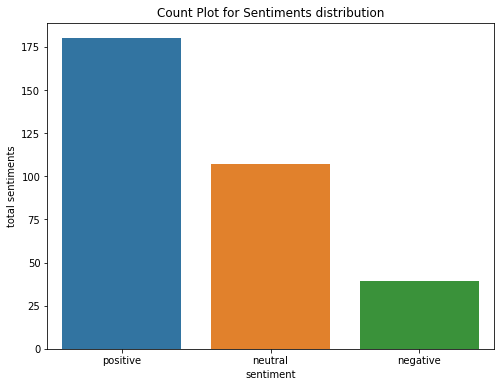

In [158]:
# sentiment distribution in the tweets
plt.figure(figsize=(8,6))
plt.title("Count Plot for Sentiments distribution")
sns.countplot(x= df['sentiment'])
plt.xlabel("sentiment")
plt.ylabel("total sentiments")

In [159]:
import plotly.express as px
def geo_dispaly (data):
  color_scale = [(0, 'orange'), (1,'red')]

  fig = px.scatter_mapbox(data, 
                          lat="latitude", 
                          lon="longitude", 
                          hover_name="userLocation", 
                          hover_data=["polarity"],
                          color='polarity',
                          color_continuous_scale=color_scale,
                          size='polarity',
                          zoom=8, 
                          height=800,
                          width=800)

  fig.update_layout(mapbox_style="open-street-map")
  fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
  return fig.show()

In [163]:
fig = px.choropleth(df, locations=df.userLocation,
                    locationmode="country names", color='polarity', 
                    scope="world",
                    hover_name="sentiment",
                    color_continuous_scale=px.colors.sequential.PuRd
                   )


fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0}, title_text="World's sentiments renewable energy during UN COP 26 ", title_x=0.3, title_y=0.96,font_size=18)
 
fig.show()

The data shows that the sentiments are positivein United States, Africa, Australia and the better part of Europe.  India, Germany, France,Pakistan, Italy, and Singapore had neutral sentiments.Negative sentiments were observed in Brazil.

## Task 2.4 Subjectivity analysis
Calculate the subjectivity values of all the tweets. For a given geographical location, if you have more 
than one tweet then find the average subjectivity value taking into consideration all the tweets 
generated from the same location. Using a suitable plot type (such as, geographical map), perform a 
geospatial visualisation of the subjectivities corresponding to all the tweets. Whilst you are free to 
choose a plot type, the visualisation must be clear and easy to understand/interpret.

In [161]:
df['subjectivity'] = df.tweetContent.apply(lambda tweet: TextBlob(tweet).sentiment.subjectivity)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,index,tweetURL,tweetID,date,tweetContent,userLocation,isUserVerified,replyCount,retweetCount,likeCount,quoteCount,tweetLanguage,sourceLabel,place,latitude,longitude,polarity,sentiment,subjectivity
11459,14388,https://twitter.com/DukeUEnergy/status/1453805...,1453805477582696454,2021-10-28T19:26:50+00:00,take accelerate clean energy transition invite...,"Durham, NC",False,0,2,4,0,en,Twitter Web App,NaN,35.996653,-78.901805,0.183333,positive,0.600000
6311,7929,https://twitter.com/UNEPDTU/status/14566241924...,1456624192435200003,2021-11-05T14:07:24+00:00,join cop26 event looking specific challenges c...,"Copenhagen, Denmark",False,0,1,4,1,en,Twitter Web App,NaN,55.686724,12.570072,0.000000,neutral,0.062500
8285,10414,https://twitter.com/PowerNI/status/14559145016...,1455914501673525255,2021-11-03T15:07:21+00:00,senior analyst dr joe devlin delighted invited...,Northern Ireland,False,0,2,11,0,en,Twitter Web App,NaN,54.585984,-6.959155,0.408333,positive,0.591667
11601,14568,https://twitter.com/WSJmarkets/status/14537356...,1453735678487908352,2021-10-28T14:49:29+00:00,heard street splitting oil greener business ar...,"New York, NY",True,0,0,1,0,en,SocialFlow,NaN,40.712728,-74.006015,0.250000,positive,0.400000
7802,9800,https://twitter.com/ICLEI_carbonn/status/14561...,1456184483594506242,2021-11-04T09:00:10+00:00,know 100 renewables key staying 1 5 degrees jo...,"Bonn, Germany",False,0,0,1,0,en,Buffer,NaN,50.735851,7.100660,0.000000,neutral,1.000000


In [164]:
fig = px.choropleth(df, locations=df.userLocation,
                    locationmode="country names", color='subjectivity', 
                    scope="world",
                    color_continuous_scale=px.colors.sequential.PuRd
                   )


fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0}, title_text="World's subjectivity green sources of energy during UN COP 26 ", title_x=0.3, title_y=0.96,font_size=18)
 
fig.show()